In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from lifelines import KaplanMeierFitter, CoxPHFitter
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [54]:
metadata = pd.read_csv("~/Desktop/hmp2_metadata.csv")
fecalcal_info_MGX = metadata.loc[metadata.data_type == "metagenomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_MGX = fecalcal_info_MGX[~fecalcal_info_MGX["External ID"].str.contains("_P")]
fecalcal_info_MGX = fecalcal_info_MGX[~fecalcal_info_MGX["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_MGX = fecalcal_info_MGX.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal_ng_ml]
fecalcal_info_MGX.fecalcal = fecalcal_info_MGX.fecalcal.fillna(fecalcal_info_MGX['fecalcal_ng_ml'])
fecalcal_info_MGX.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_MGX.to_csv('~/Desktop/select_samples_MGX.csv')

/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_66444/541646005.py:1: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("~/Desktop/hmp2_metadata.csv")


In [14]:
fecalcal_info_pro = metadata.loc[metadata.data_type == "proteomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_pro = fecalcal_info_pro[~fecalcal_info_pro["External ID"].str.contains("_P")]
fecalcal_info_pro = fecalcal_info_pro[~fecalcal_info_pro["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_pro.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_pro.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_pro = fecalcal_info_pro.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_pro.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_pro.fecalcal_ng_ml]
fecalcal_info_pro.fecalcal = fecalcal_info_pro.fecalcal.fillna(fecalcal_info_pro['fecalcal_ng_ml'])
fecalcal_info_pro.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_pro

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt
3990,CSM5FZ3N,C3001,CD,4,193.89000,Female,2014-03-14
3991,CSM5FZ4C,C3001,CD,8,61.34000,Female,2014-05-09
3992,CSM5MCVV,C3001,CD,13,115.27000,Female,2014-07-10
3993,CSM67UA2,C3001,CD,20,23.20350,Female,2014-09-30
3994,CSM79HMZ,C3001,CD,30,48.90000,Female,2015-02-03
...,...,...,...,...,...,...,...
4434,PSM7J12R,P6024,CD,18,260.40000,Male,2015-09-10
4436,PSMA263W,P6024,CD,25,255.10000,Male,2015-12-16
4437,PSMA264Q,P6035,UC,6,63.81772,Male,2015-11-03
4438,PSMA267P,P6035,UC,15,14.57958,Male,2016-03-15


In [15]:
fecalcal_info_16S= metadata.loc[metadata.data_type == "stool_16S", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_16S = fecalcal_info_16S[~fecalcal_info_16S["External ID"].str.contains("_P")]
fecalcal_info_16S = fecalcal_info_16S[~fecalcal_info_16S["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_16S.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_16S.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_16S = fecalcal_info_16S.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_16S.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_16S.fecalcal_ng_ml]
fecalcal_info_16S.fecalcal = fecalcal_info_16S.fecalcal.fillna(fecalcal_info_16S['fecalcal_ng_ml'])
fecalcal_info_16S.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_16S

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt
4650,CSM5FZ3N,C3001,CD,4,193.89,Female,2014-03-14
4651,CSM5FZ3R,C3001,CD,5,133.01,Female,2014-03-28
4652,CSM5YRY7,C3001,CD,6,198.84,Female,2014-04-15
4653,CSM5FZ3V,C3001,CD,7,46.86,Female,2014-04-28
4654,CSM5FZ4C,C3001,CD,8,61.34,Female,2014-05-09
...,...,...,...,...,...,...,...
4825,MSM5LLGV,M2028,CD,9,203.02,Female,2014-07-09
4826,MSM5LLGX,M2028,CD,11,228.24,Female,2014-07-23
4827,MSM5LLEH,M2034,CD,4,79.94,Female,2014-06-26
4828,MSM5LLEX,M2034,CD,5,33.99,Female,2014-07-08


In [16]:
fecalcal_info_vir= metadata.loc[metadata.data_type == "viromics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_vir = fecalcal_info_vir[~fecalcal_info_vir["External ID"].str.contains("_P")]
fecalcal_info_vir = fecalcal_info_vir[~fecalcal_info_vir["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_vir.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_vir.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_vir = fecalcal_info_vir.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_vir.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_vir.fecalcal_ng_ml]
fecalcal_info_vir.fecalcal = fecalcal_info_vir.fecalcal.fillna(fecalcal_info_vir['fecalcal_ng_ml'])
fecalcal_info_vir.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_vir

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt
4831,CSM67UA2,C3001,CD,20,23.20350,Female,2014-09-30
4832,CSM79HGP,C3001,CD,26,37.17836,Female,2014-12-10
4833,CSM5MCVN,C3002,CD,13,15.97901,Female,2014-08-19
4834,CSM67UBH,C3002,CD,19,14.51068,Female,2014-10-28
4835,CSM67UBN,C3002,CD,22,16.32450,Female,2014-12-09
...,...,...,...,...,...,...,...
5503,PSMA263W,P6024,CD,25,255.10000,Male,2015-12-16
5514,PSMA264U,P6035,UC,8,17.44622,Male,2015-12-01
5515,PSMA267J,P6035,UC,12,15.50000,Male,2016-01-19
5516,PSMA267P,P6035,UC,15,14.57958,Male,2016-03-15


In [53]:
fecalcal_info_MTX= metadata.loc[metadata.data_type == "metatranscriptomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_MTX = fecalcal_info_MTX[~fecalcal_info_MTX["External ID"].str.contains("_P")]
fecalcal_info_MTX = fecalcal_info_MTX[~fecalcal_info_MTX["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_MTX = fecalcal_info_MTX.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal_ng_ml]
fecalcal_info_MTX.fecalcal = fecalcal_info_MTX.fecalcal.fillna(fecalcal_info_MTX['fecalcal_ng_ml'])
fecalcal_info_MTX.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_MTX

In [18]:
fecalcal_info_metabo= metadata.loc[metadata.data_type == "metabolomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_metabo = fecalcal_info_metabo[~fecalcal_info_metabo["External ID"].str.contains("_P")]
fecalcal_info_metabo = fecalcal_info_metabo[~fecalcal_info_metabo["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_metabo.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_metabo.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_metabo = fecalcal_info_metabo.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_metabo.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_metabo.fecalcal_ng_ml]
fecalcal_info_metabo.fecalcal = fecalcal_info_metabo.fecalcal.fillna(fecalcal_info_metabo['fecalcal_ng_ml'])
fecalcal_info_metabo.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_metabo

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt
522,CSM5FZ3N,C3001,CD,4,193.89000,Female,2014-03-14
523,CSM5FZ4C,C3001,CD,8,61.34000,Female,2014-05-09
524,CSM5MCVV,C3001,CD,13,115.27000,Female,2014-07-10
525,CSM67UA2,C3001,CD,20,23.20350,Female,2014-09-30
526,CSM79HGP,C3001,CD,26,37.17836,Female,2014-12-10
...,...,...,...,...,...,...,...
1044,PSM7J134,P6025,UC,18,325.71190,Male,2015-10-06
1055,PSMA264Q,P6035,UC,6,63.81772,Male,2015-11-03
1056,PSMA267J,P6035,UC,12,15.50000,Male,2016-01-19
1057,PSMA267P,P6035,UC,15,14.57958,Male,2016-03-15


In [56]:
fecalcal_time = pd.concat([fecalcal_info_16S,fecalcal_info_vir,fecalcal_info_MTX,fecalcal_info_pro,fecalcal_info_metabo,fecalcal_info_MGX])
fecalcal_time.sort_values(by="Participant ID").drop_duplicates()
fecalcal_time["date_of_receipt"] = pd.to_datetime(fecalcal_time["date_of_receipt"])
fecalcal_time.to_csv('~/Desktop/fecalcal_higher.csv')

In [20]:
date_min = min(fecalcal_time["date_of_receipt"])
date_max = max(fecalcal_time["date_of_receipt"])
study_len = date_max - date_min
print(f'Data min: {date_min}')
print(f'Data max: {date_max}')
print(study_len)

Data min: 2013-12-11 00:00:00
Data max: 2016-06-01 00:00:00
903 days 00:00:00


In [21]:
fecalcal_time.loc[fecalcal_time['fecalcal']<200, 'fecalcal_bin'] = '0'
fecalcal_time.loc[fecalcal_time['fecalcal']>=200, 'fecalcal_bin'] = '1'
fecalcal_time['days_event'] = (fecalcal_time['date_of_receipt'] - date_min)
fecalcal_time['days_event'] = fecalcal_time['days_event'].dt.days
fecalcal_time

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt,fecalcal_bin,days_event
4650,CSM5FZ3N,C3001,CD,4,193.89000,Female,2014-03-14,0,93
4651,CSM5FZ3R,C3001,CD,5,133.01000,Female,2014-03-28,0,107
4652,CSM5YRY7,C3001,CD,6,198.84000,Female,2014-04-15,0,125
4653,CSM5FZ3V,C3001,CD,7,46.86000,Female,2014-04-28,0,138
4654,CSM5FZ4C,C3001,CD,8,61.34000,Female,2014-05-09,0,149
...,...,...,...,...,...,...,...,...,...
2676,PSMA264Q,P6035,UC,6,63.81772,Male,2015-11-03,0,692
2678,PSMA264U,P6035,UC,8,17.44622,Male,2015-12-01,0,720
2680,PSMA267J,P6035,UC,12,15.50000,Male,2016-01-19,0,769
2681,PSMA267P,P6035,UC,15,14.57958,Male,2016-03-15,0,825


In [22]:
kmf = KaplanMeierFitter()
kmf.fit(fecalcal_time.days_event, fecalcal_time.fecalcal_bin, label='Kaplan Meier Estimate')
kmf.survival_function_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


,Kaplan Meier Estimate
timeline,
0.0,0.997666
62.0,0.997083
70.0,0.994166
86.0,0.994166
90.0,0.993582
...,...
860.0,0.315696
874.0,0.232618
882.0,0.232618


<AxesSubplot:xlabel='timeline'>

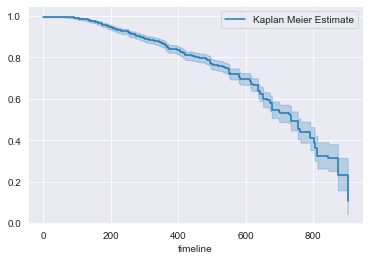

In [23]:
kmf.plot(ci_show=True)


In [24]:
fecalcal_time['sex'] = fecalcal_time['sex'].astype('category')
groups = fecalcal_time['sex']
i1 = (groups == 'Male')  ## males
i2 = (groups == 'Female') ## females

kmf1 = KaplanMeierFitter()
kmf1.fit(fecalcal_time['days_event'][fecalcal_time['sex'] == "Male"], fecalcal_time['fecalcal_bin'][fecalcal_time['sex'] == "Male"], label='Male')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"Male", fitted with 873 total observations, 599 right-censored observations>

In [25]:
kmf2 = KaplanMeierFitter()
kmf2.fit(fecalcal_time['days_event'][fecalcal_time['sex'] == 'Female'], fecalcal_time['fecalcal_bin'][fecalcal_time['sex'] == 'Female'], label='Female')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"Female", fitted with 841 total observations, 641 right-censored observations>

<AxesSubplot:xlabel='timeline'>

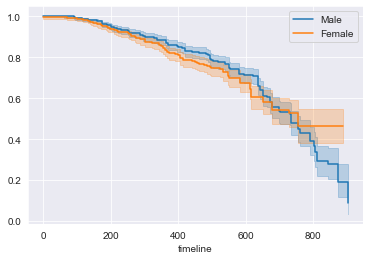

In [26]:
a1 = kmf1.plot()
kmf2.plot(ax=a1)

In [27]:
fecalcal_time['diagnosis'] = fecalcal_time['diagnosis'].astype('category')
groups = fecalcal_time['diagnosis']
i1 = (groups == 'UC')
i2 = (groups == 'CD') ## females
i3 = (groups == 'nonIBD') ## females

kmf1 = KaplanMeierFitter()
kmf1.fit(fecalcal_time['days_event'][fecalcal_time['diagnosis'] == "UC"], fecalcal_time['fecalcal_bin'][fecalcal_time['diagnosis'] == "UC"], label='UC')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"UC", fitted with 469 total observations, 291 right-censored observations>

In [28]:
kmf2 = KaplanMeierFitter()
kmf2.fit(fecalcal_time['days_event'][fecalcal_time['diagnosis'] == "CD"], fecalcal_time['fecalcal_bin'][fecalcal_time['diagnosis'] == "CD"], label='CD')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"CD", fitted with 807 total observations, 525 right-censored observations>

In [29]:
kmf3 = KaplanMeierFitter()
kmf3.fit(fecalcal_time['days_event'][fecalcal_time['diagnosis'] == "nonIBD"], fecalcal_time['fecalcal_bin'][fecalcal_time['diagnosis'] == "nonIBD"], label='nonIBD')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"nonIBD", fitted with 438 total observations, 424 right-censored observations>

<AxesSubplot:xlabel='timeline'>

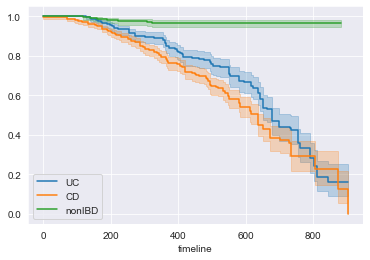

In [30]:
a1 = kmf1.plot()
kmf2.plot(ax=a1)
kmf3.plot(ax=a1)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text")  # displays text representation of estimatorsset_config(display="text")  # displays text representation of estimators


In [32]:
MGX = pd.read_csv("~/Desktop/Metaphlan3_to_cox.csv").set_index("External ID")
fecalcal_info_MGX = fecalcal_info_MGX.set_index("External ID")
to_cox = pd.merge(MGX,fecalcal_info_MGX, left_index=True, right_index=True)
to_cox["date_of_receipt"] = pd.to_datetime(to_cox["date_of_receipt"])

date_min = min(to_cox["date_of_receipt"])
date_max = max(to_cox["date_of_receipt"])
study_len = date_max - date_min
print(f'Data min: {date_min}')
print(f'Data max: {date_max}')
print(study_len)

to_cox.loc[to_cox['fecalcal']<200, 'fecalcal_bin'] = False
to_cox.loc[to_cox['fecalcal']>=200, 'fecalcal_bin'] = True
to_cox['days_event'] = (to_cox['date_of_receipt'] - date_min)
to_cox['days_event'] = to_cox['days_event'].dt.days
to_cox.reset_index(inplace=True)
to_cox

Data min: 2013-12-11 00:00:00
Data max: 2015-12-15 00:00:00
734 days 00:00:00


,External ID,s__Eubacterium_rectale,s__Bacteroides_vulgatus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_uniformis,s__Ruminococcus_bromii,s__Roseburia_intestinalis,s__Bacteroides_xylanisolvens,...,s__Lachnoclostridium_sp_An298,diagnosis_x,Participant ID,diagnosis_y,visit_num,fecalcal,sex,date_of_receipt,fecalcal_bin,days_event
0,CSM67UA2,1.60280,36.71092,2.08272,0.04617,1.35692,27.54215,0.09280,0.06951,10.33616,...,0.00000,CD,C3001,CD,20,23.20350,Female,2014-09-30,False,293
1,CSM5MCVN,1.40462,59.26093,0.04425,0.22007,1.65773,21.76774,0.36580,0.06669,3.50131,...,0.00000,CD,C3002,CD,13,15.97901,Female,2014-08-19,False,251
2,CSM67UBZ,0.19670,54.03134,4.19026,0.02277,9.26557,20.48908,1.21533,1.17502,0.31175,...,0.00000,UC,C3003,UC,19,12.70000,Female,2014-11-06,False,330
3,CSM5MCXL,4.00191,28.84702,14.26485,1.05975,1.21332,17.05426,0.13059,12.08812,0.00460,...,0.00000,UC,C3004,UC,13,14.82410,Female,2014-09-03,False,266
4,CSM5MCY8,0.88858,37.24257,0.04678,0.51389,1.98052,12.58333,0.30843,0.68305,3.88345,...,0.00000,UC,C3005,UC,13,229.04730,Female,2014-09-09,True,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,PSM7J19N,1.76115,5.96316,0.02227,0.78443,5.45038,5.43963,0.33984,0.94363,1.69432,...,0.01555,nonIBD,P6017,nonIBD,6,13.47861,Male,2015-03-30,False,474
79,PSM6XBW3,0.01044,7.59653,0.36539,0.09284,4.52676,1.40925,0.22098,0.39336,0.20741,...,0.01555,nonIBD,P6018,nonIBD,4,79.82248,Female,2015-02-24,False,440
80,PSM7J12J,2.08201,31.18294,1.86483,0.29568,6.08941,9.68155,0.39770,0.84954,0.67501,...,0.00000,CD,P6024,CD,13,289.22620,Male,2015-07-14,True,580
81,PSM7J1BX,13.54000,19.07588,2.74675,0.02717,18.13113,8.34907,1.96454,6.52488,0.11197,...,0.00000,UC,P6025,UC,6,15.90414,Male,2015-04-28,False,503


In [33]:
to_cox["fecalcal_bin"] = to_cox["fecalcal_bin"].astype(bool)
to_cox["days_event"] = to_cox["days_event"].astype(float)
X = to_cox.iloc[:,2:499]
y = to_cox[["fecalcal_bin","days_event"]].to_records(index=False)

Xt = OneHotEncoder().fit_transform(X)
Xt.round(2).head()


,s__Bacteroides_vulgatus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_uniformis,s__Ruminococcus_bromii,s__Roseburia_intestinalis,s__Bacteroides_xylanisolvens,s__Eubacterium_sp_CAG_38,s__Dialister_invisus,...,s__Prevotella_sp_S7_1_8,s__Dysgonomonas_mossii,s__Lactobacillus_oris,s__Anaerostipes_sp_992a,s__Prevotella_amnii,s__Clostridium_sp_CAG_413,s__Bacteroides_pectinophilus,s__Bacteroides_sp_CAG_661,s__Bacteroides_sp_CAG_598,s__Lachnoclostridium_sp_An298
0,36.71,2.08,0.05,1.36,27.54,0.09,0.07,10.34,0.22,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59.26,0.04,0.22,1.66,21.77,0.37,0.07,3.50,0.27,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.03,4.19,0.02,9.27,20.49,1.22,1.18,0.31,0.07,0.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.85,14.26,1.06,1.21,17.05,0.13,12.09,0.00,1.60,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.24,0.05,0.51,1.98,12.58,0.31,0.68,3.88,1.22,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
alphas = 10. ** np.linspace(-4, 4, 50)
coefficients = {}

cph = CoxPHSurvivalAnalysis()
for alpha in alphas:
    cph.set_params(alpha=alpha)
    cph.fit(Xt, y)
    key = round(alpha, 5)
    coefficients[key] = cph.coef_

coefficients = (pd.DataFrame
    .from_dict(coefficients)
    .rename_axis(index="feature", columns="alpha")
    .set_index(Xt.columns))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:174: RuntimeWarning: overflow encountered in exp
  risk_set2 += numpy.exp(xw[k])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:177: RuntimeWarning: overflow encountered in exp
  risk_set += numpy.exp(xw[k])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:174: RuntimeWarning: overflow encountered in exp
  risk_set2 += numpy.exp(xw[k])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:177: RuntimeWarning: overflow encountered in exp
  risk_set += numpy.exp(xw[k])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:174: RuntimeWarning: overflow encountered in exp
  risk_set2 += numpy.exp(xw[k])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.

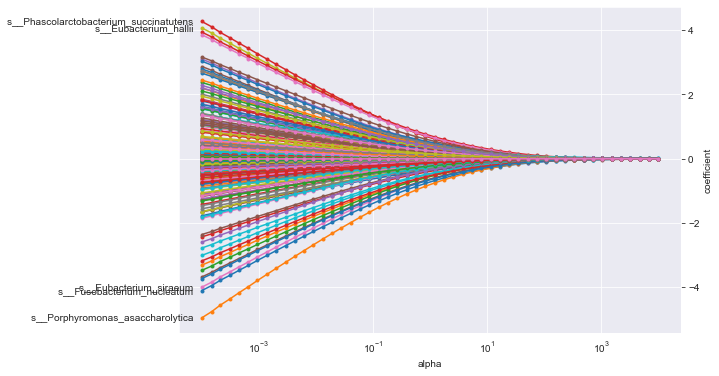

In [35]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(
            alpha_min, coef, name + "   ",
            horizontalalignment="right",
            verticalalignment="center"
        )

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")
plot_coefficients(coefficients, n_highlight=5)

In [36]:
cox_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
cox_lasso.fit(Xt, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

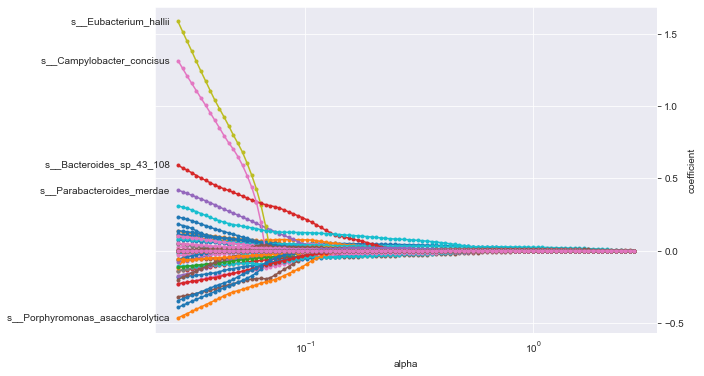

In [37]:
coefficients_lasso = pd.DataFrame(
    cox_lasso.coef_,
    index=Xt.columns,
    columns=np.round(cox_lasso.alphas_, 5)
)

plot_coefficients(coefficients_lasso, n_highlight=5)

In [38]:
cox_elastic_net = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01)
cox_elastic_net.fit(Xt, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9)

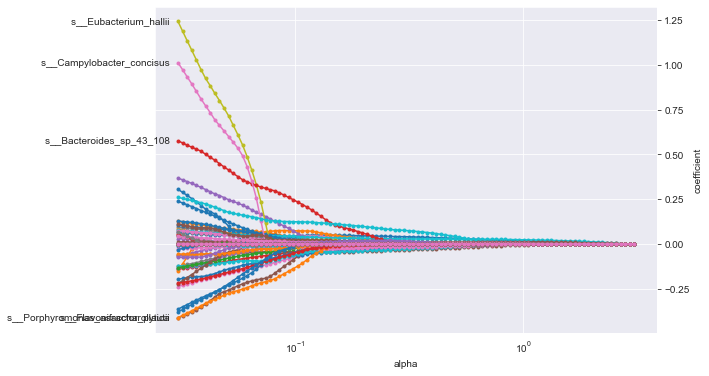

In [39]:
coefficients_elastic_net = pd.DataFrame(
    cox_elastic_net.coef_,
    index=Xt.columns,
    columns=np.round(cox_elastic_net.alphas_, 5)
)

plot_coefficients(coefficients_elastic_net, n_highlight=5)

In [40]:
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(Xt, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [41]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1).fit(Xt, y)

cv_results = pd.DataFrame(gcv.cv_results_)

Number of non-zero coefficients: 7


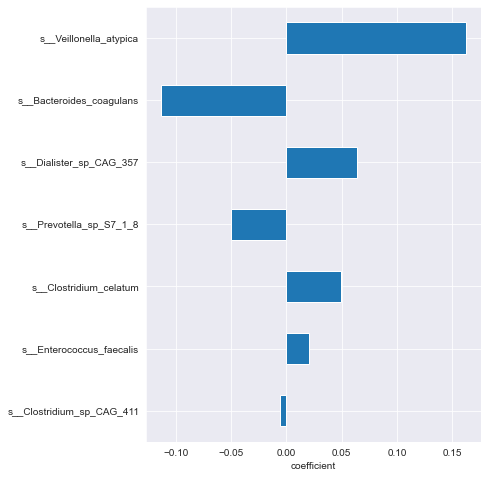

In [42]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=Xt.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)